In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmin, argrelmax
import jcm_lib as jcm
import matplotlib as mpl
from matplotlib import cm
%matplotlib widget
#DEFINIMOS LOS OPERADORES QUE VAMOS A USAR EN LOS CALCULOS
N_c=3
n=tensor(qeye(2),qeye(2),num(N_c))
# sqrtN=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,np.sqrt(2)])))
n2=tensor(qeye(2),qeye(2),Qobj(np.diag([i*i for i in range(N_c)])))
a=tensor(qeye(2),qeye(2),destroy(N_c))
sm1=tensor(sigmam(),qeye(2),qeye(N_c))
sp1=tensor(sigmap(),qeye(2),qeye(N_c))
sz1=tensor(sigmaz(),qeye(2),qeye(N_c))
sx1=tensor(sigmax(),qeye(2),qeye(N_c))
sm2=tensor(qeye(2),sigmam(),qeye(N_c))
sp2=tensor(qeye(2),sigmap(),qeye(N_c))
sz2=tensor(qeye(2),sigmaz(),qeye(N_c))
sx2=tensor(qeye(2),sigmax(),qeye(N_c))

#DEFINIMOS LOS VECgORES DE LA BASE
e=basis(2,0)
gr=basis(2,1)

e0=tensor(e,basis(N_c,0))
g0=tensor(gr,basis(N_c,0))
g1=tensor(gr,basis(N_c,1))
sx=tensor(sigmax(),qeye(N_c))
sy=tensor(sigmay(),qeye(N_c))
sz=tensor(sigmaz(),qeye(N_c))
sp=tensor(sigmap(),qeye(N_c))
sm=tensor(sigmam(),qeye(N_c))


ee0=tensor(e,e,basis(N_c,0)) #0
ee1=tensor(e,e,basis(N_c,1)) #1
ee2=tensor(e,e,basis(N_c,2)) #2

eg0=tensor(e,gr,basis(N_c,0)) #3
ge0=tensor(gr,e,basis(N_c,0)) #6

eg1=tensor(e,gr,basis(N_c,1)) #4
ge1=tensor(gr,e,basis(N_c,1)) #7

eg2=tensor(e,gr,basis(N_c,2)) #5
ge2=tensor(gr,e,basis(N_c,2)) #8

gg0=tensor(gr,gr,basis(N_c,0)) #9
gg1=tensor(gr,gr,basis(N_c,1)) #10
gg2=tensor(gr,gr,basis(N_c,2)) #11


SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure.subplot',left=0.1)
plt.rc('figure.subplot',bottom=0.102)
plt.rc('figure.subplot',right=0.962)
plt.rc('figure.subplot',top=0.95)


def beta_n(n_:int,k,J:float,x):
    return -(x*(n_**2+(n_-1)**2+(n_-2)**2)+J+2*k)

def gamma_n(n_:int,d,g:float,k,J:float,x,a:float=0.5):
    return (x*(n_-1)**2-J+2*k)*(x*(n_-2)**2+x*n_**2+2*J)+(x*(n_-2)**2+d+J)*(x*n_**2-d+J)-2*g**2*(n_**(2*a)+(n_-1)**(2*a))

def eta_n(n_:int,d,g:float,k,J:float,x,a:float=0.5):
    return -(x*n_**2 - d + J)*(x*(n_ - 2)**2 + d + J)*(x*(n_ - 1)**2 - J + 2*k)+ 2*g**2*(x*(n_ - 2)**2*n_**(2*a) + x*n_**2*(n_ - 1)**(2*a) + d* (n_**(2*a) - (n_ - 1)**(2*a)) + J*(n_**(2*a) - (n_ - 1)**(2*a)))

def Q_n(n_:int,d,g:float,k,J:float,x):
    return gamma_n(n_,d,g,k,J,x)/3-beta_n(n_,k,J,x)*beta_n(n_,k,J,x)/9

def R_n(n_:int,d,g:float,k,J:float,x):
    return 1/54*(9*beta_n(n_,k,J,x)*gamma_n(n_,d,g,k,J,x)-27*eta_n(n_,d,g,k,J,x)-2*beta_n(n_,k,J,x)*beta_n(n_,k,J,x)*beta_n(n_,k,J,x))

def theta_n(n_:int,d,g:float,k,J:float,x):
    return np.arccos(R_n(n_,d,g,k,J,x)/np.sqrt(-Q_n(n_,d,g,k,J,x)**3))

def En_(n_:int,j:int,d,g:float,k,J:float,x):
    return -beta_n(n_,k,J,x)/3+2*np.sqrt(-Q_n(n_,d,g,k,J,x))*np.cos((theta_n(n_,d,g,k,J,x)+2*(j-1)*np.pi)/3)

def Omega_n_ij(n_,i,j,d,g,k,J,x):
    return En_(n_,j,d,g,k,J,x)-En_(n_,i,d,g,k,J,x)

def energiasn1(j,g,d,x,k,J):
    if j==1: return (x-d)/2+k+np.sqrt(2*g**2+(k-J+(d-x)/2)**2)
    elif j==2: return (x-d)/2+k-np.sqrt(2*g**2+(k-J+(d-x)/2)**2)
    elif j==3: return -2*k-J
    else: 
        print('valor inesperado de j')
        exit()

ENERGIAS

In [2]:
w=1
g=0.01*w

d=np.linspace(-50*g,50*g,5000)
x=np.linspace(0,15*g,50)
k=np.linspace(-10*g,10*g,50)
J=0

In [3]:
# x_mesh,k_mesh=np.meshgrid(x,k)

# d_q_min=np.zeros((len(x),len(k)))
# q_min=np.zeros((len(x),len(k)))

# d_1_min=np.zeros((len(x),len(k)))
# R1_min=np.zeros((len(x),len(k)))

# d_2_min=np.zeros((len(x),len(k)))
# R2_min=np.zeros((len(x),len(k)))

# d_3_min=np.zeros((len(x),len(k)))
# R3_min=np.zeros((len(x),len(k)))

# for i,x_i in enumerate(x):
#     for j,k_j in enumerate(k):
#         Q=np.sqrt(-Q_n(2,d,g,k_j,J,x_i))
#         R1=np.cos((theta_n(2,d,g,k_j,J,x_i)+2*(1-1)*np.pi)/3)
#         R2=np.cos((theta_n(2,d,g,k_j,J,x_i)+2*(2-1)*np.pi)/3)
#         R3=np.cos((theta_n(2,d,g,k_j,J,x_i)+2*(3-1)*np.pi)/3)

#         i_min=np.argmin(Q)
#         i_1_min=np.argmin(R1)
#         i_2_min=np.argmin(R2)
#         i_3_min=np.argmin(R3)

#         # if type(i_min) is not 'numpy.float':
#         #     print(f'i_min multiples para x={x_i} y k={k_j}')
#         #     i_min=i_min[0]
#         #     break
#         d_q_min[j,i]=d[i_min]
#         q_min[j,i]=Q[i_min]

#         d_1_min[j,i]=d[i_1_min]
#         R1_min[j,i]=R1[i_1_min]

#         d_2_min[j,i]=d[i_2_min]
#         R2_min[j,i]=R2[i_2_min]

#         d_3_min[j,i]=d[i_3_min]
#         R3_min[j,i]=R3[i_3_min]

# # color_dimension = q_min # change to desired fourth dimension
# # minn, maxx = color_dimension.min(), color_dimension.max()
# # norm = mpl.colors.Normalize(minn, maxx)
# # m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
# # m.set_array([])
# # fcolors = m.to_rgba(color_dimension)

# fig_q=plt.figure(figsize=(8,6))
# ax_q=fig_q.add_subplot(221,projection='3d')
# ax_q.plot_surface(x_mesh/g,k_mesh/g,d_q_min,color='black')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)

# ax_1=fig_q.add_subplot(222,projection='3d')
# ax_1.plot_surface(x_mesh/g,k_mesh/g,d_1_min,color='red')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)

# ax_2=fig_q.add_subplot(223,projection='3d')
# ax_2.plot_surface(x_mesh/g,k_mesh/g,d_2_min,color='green')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)

# ax_3=fig_q.add_subplot(224,projection='3d')
# ax_3.plot_surface(x_mesh/g,k_mesh/g,d_3_min,color='blue')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)
# # cbar = fig_q.colorbar(m, ax=ax_q, shrink=0.5, aspect=5)
# # cbar.set_label('min(Q)')
# ax_q.set_xlabel('x/g')
# ax_q.set_ylabel('k/g')
# ax_q.set_zlabel('d/g')

# plt.show()

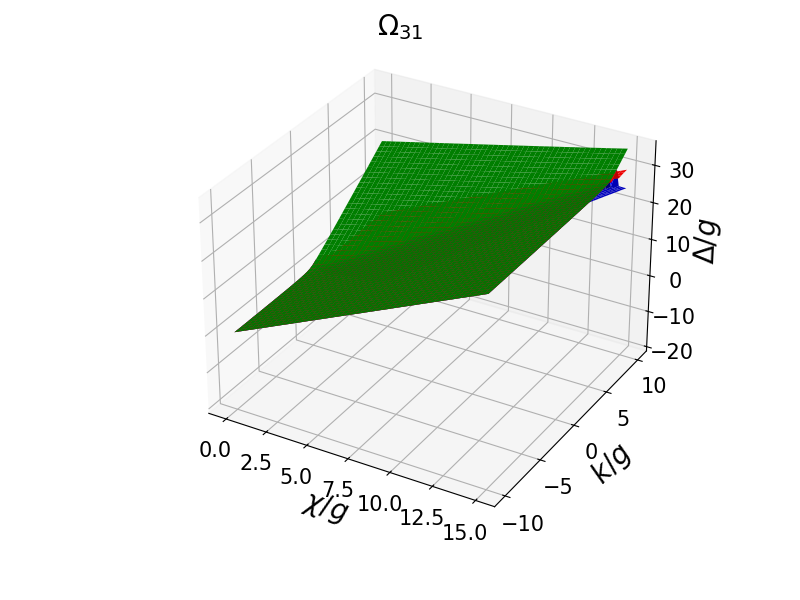

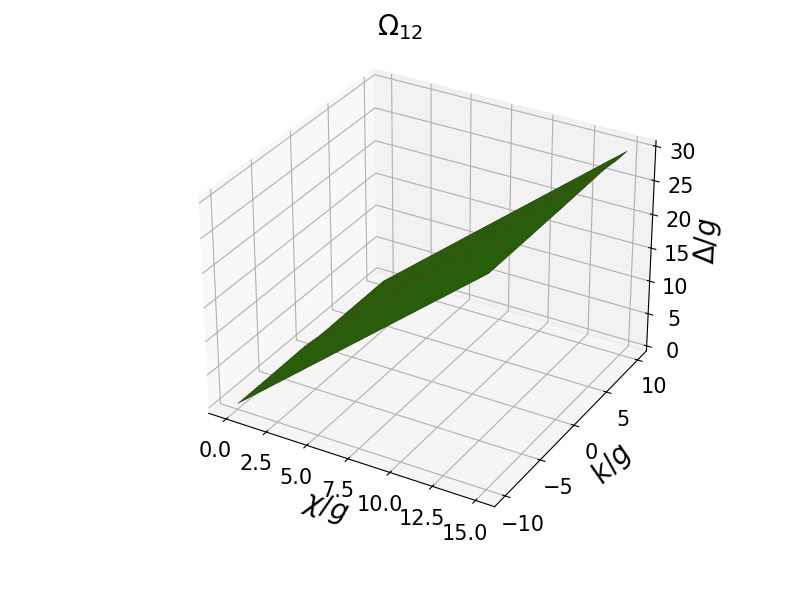

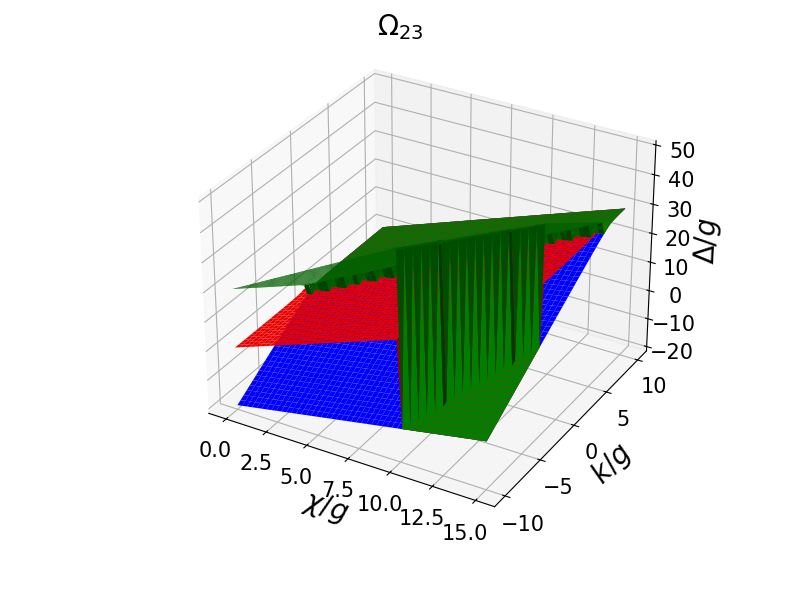

In [4]:
x_mesh,k_mesh=np.meshgrid(x,k)

d_O12_min=np.zeros((3,len(x),len(k)))
O12_min=np.zeros((3,len(x),len(k)))

d_O23_min=np.zeros((3,len(x),len(k)))
O23_min=np.zeros((3,len(x),len(k)))

d_O31_min=np.zeros((3,len(x),len(k)))
O31_min=np.zeros((3,len(x),len(k)))

for i,x_i in enumerate(x):
    for j,k_j in enumerate(k):

        O12=np.abs(Omega_n_ij(2,1,2,d,g,k_j,J,x_i))
        # fig,ax=plt.subplots()
        # plt.plot(d,O12)
        # plt.show()
        i_12_max=argrelmax(O12,order=1)
        i_12_min=argrelmin(O12,order=1)
        # print(i_12_min[0])
        if len(i_12_min[0])>1:
            d_O12_min[0,j,i]=d[i_12_min[0][0]]
            d_O12_min[1,j,i]=d[i_12_max[0][0]]
            d_O12_min[2,j,i]=d[i_12_min[0][1]]
        else:
            d_O12_min[0,j,i]=d[i_12_min[0][0]]
            d_O12_min[1,j,i]=d[i_12_min[0][0]]
            d_O12_min[2,j,i]=d[i_12_min[0][0]]

        O23=np.abs(Omega_n_ij(2,2,3,d,g,k_j,J,x_i))
        i_23_max=argrelmax(O23,order=1)
        i_23_min=argrelmin(O23,order=1)
        # print(i_23_min)
        if len(i_23_min[0])>1:
            d_O23_min[0,j,i]=d[i_23_min[0][0]]
            d_O23_min[1,j,i]=d[i_23_max[0][0]]
            d_O23_min[2,j,i]=d[i_23_min[0][1]]
        else:
            d_O23_min[0,j,i]=d[i_23_min[0][0]]
            d_O23_min[1,j,i]=d[i_23_min[0][0]]
            d_O23_min[2,j,i]=d[i_23_min[0][0]]
        
        O31=np.abs(Omega_n_ij(2,3,1,d,g,k_j,J,x_i))
        i_31_min=argrelmin(O31,order=1)
        i_31_max=argrelmax(O31,order=1)
        if len(i_31_min[0])>1:
            d_O31_min[0,j,i]=d[i_31_min[0][0]]
            d_O31_min[1,j,i]=d[i_31_max[0][0]]
            d_O31_min[2,j,i]=d[i_31_min[0][1]]
        else:
            d_O31_min[0,j,i]=d[i_31_min[0][0]]
            d_O31_min[1,j,i]=d[i_31_min[0][0]]
            d_O31_min[2,j,i]=d[i_31_min[0][0]]

# color_dimension = q_min # change to desired fourth dimension
# minn, maxx = color_dimension.min(), color_dimension.max()
# norm = mpl.colors.Normalize(minn, maxx)
# m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
# m.set_array([])
# fcolors = m.to_rgba(color_dimension)

fig_12=plt.figure(figsize=(8,6))
fig_12.suptitle(r'$\Omega_{12}$')
ax_12=fig_12.add_subplot(111,projection='3d')
ax_12.plot_surface(x_mesh/g,k_mesh/g,d_O12_min[0]/g,color='blue')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)
ax_12.plot_surface(x_mesh/g,k_mesh/g,d_O12_min[1]/g,color='red')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)
ax_12.plot_surface(x_mesh/g,k_mesh/g,d_O12_min[2]/g,color='green')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)

fig_23=plt.figure(figsize=(8,6))
fig_23.suptitle(r'$\Omega_{23}$')
ax_23=fig_23.add_subplot(111,projection='3d')
ax_23.plot_surface(x_mesh/g,k_mesh/g,d_O23_min[0]/g,color='blue')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)
ax_23.plot_surface(x_mesh/g,k_mesh/g,d_O23_min[1]/g,color='red')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)
ax_23.plot_surface(x_mesh/g,k_mesh/g,d_O23_min[2]/g,color='green')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)

fig_31=plt.figure(figsize=(8,6))
fig_31.suptitle(r'$\Omega_{31}$')
ax_31=fig_31.add_subplot(111,projection='3d')
ax_31.plot_surface(x_mesh/g,k_mesh/g,d_O31_min[0]/g,color='blue')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)
ax_31.plot_surface(x_mesh/g,k_mesh/g,d_O31_min[1]/g,color='red')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)
ax_31.plot_surface(x_mesh/g,k_mesh/g,d_O31_min[2]/g,color='green')#,rstride=1, cstride=1, facecolor=fcolors,vmin=minn,vmax=maxx,shade=False)


# ax_12.plot_surface(x_mesh/g,k_mesh/g,2*x_mesh/g,color='black')
# ax_23.plot_surface(x_mesh/g,k_mesh/g,2*x_mesh/g,color='black')
# ax_31.plot_surface(x_mesh/g,k_mesh/g,2*x_mesh/g,color='black')

# ax_12.plot_surface(x_mesh/g,k_mesh/g,x_mesh/g+2*k_mesh/g,color='black')
# ax_23.plot_surface(x_mesh/g,k_mesh/g,x_mesh/g+2*k_mesh/g,color='black')
# ax_31.plot_surface(x_mesh/g,k_mesh/g,x_mesh/g+2*k_mesh/g,color='black')

# ax_12.plot_surface(x_mesh/g,k_mesh/g,3*x_mesh/g-2*k_mesh/g,color='black')
# ax_23.plot_surface(x_mesh/g,k_mesh/g,3*x_mesh/g-2*k_mesh/g,color='black')
# ax_31.plot_surface(x_mesh/g,k_mesh/g,3*x_mesh/g-2*k_mesh/g,color='black')

# cbar = fig_q.colorbar(m, ax=ax_q, shrink=0.5, aspect=5)
# cbar.set_label('min(Q)')
ax_12.set_xlabel(r'$\chi/g$')
ax_12.set_ylabel(r'$k/g$')
ax_12.set_zlabel(r'$\Delta/g$')

ax_23.set_xlabel(r'$\chi/g$')
ax_23.set_ylabel(r'$k/g$')
ax_23.set_zlabel(r'$\Delta/g$')

ax_31.set_xlabel(r'$\chi/g$')
ax_31.set_ylabel(r'$k/g$')
ax_31.set_zlabel(r'$\Delta/g$')

plt.show()

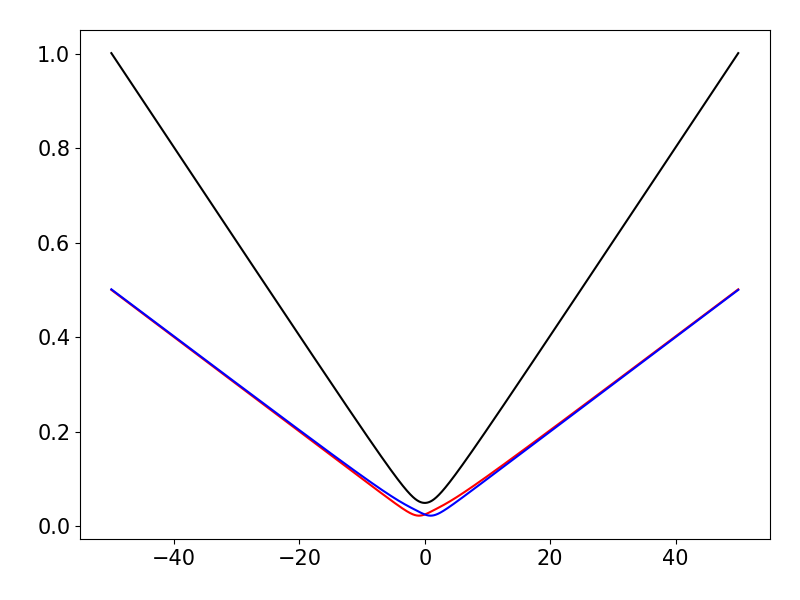

In [5]:
x=0*g
k=0*g

w=1
g=0.01*w

d=np.linspace(-50*g,50*g,5000)

J=0

fig_energias=plt.figure(figsize=(8,6))
ax_e1=fig_energias.add_subplot(111)

ax_e1.plot(d/g,np.abs(Omega_n_ij(2,2,1,d,g,k,J,x)),color='black')
ax_e1.plot(d/g,np.abs(Omega_n_ij(2,3,2,d,g,k,J,x)),color='red')
ax_e1.plot(d/g,np.abs(Omega_n_ij(2,3,1,d,g,k,J,x)),color='blue')



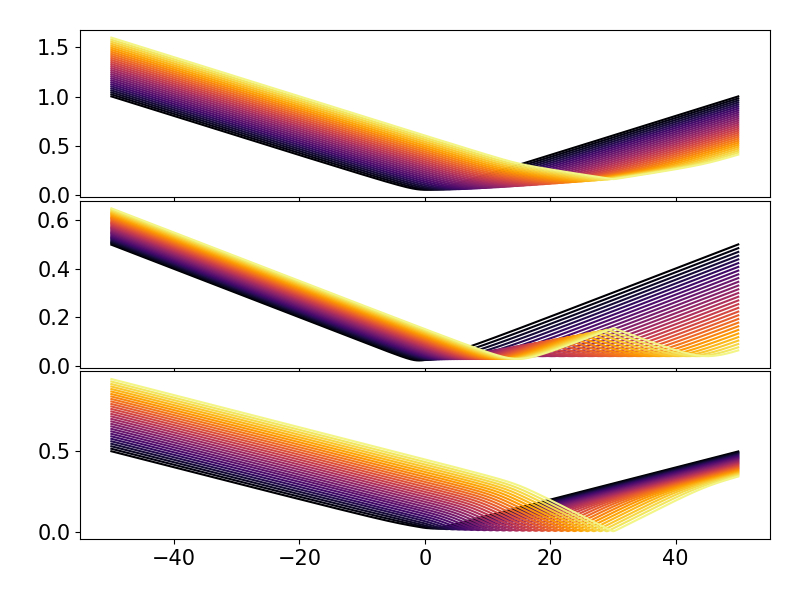

In [6]:
w=1
g=0.01*w

d=np.linspace(-50*g,50*g,5000)
x=np.linspace(0,15*g,30)
k=0
J=0

fig_energias=plt.figure(figsize=(8,6))
ax_e1=fig_energias.add_subplot(311)
ax_e2=fig_energias.add_subplot(312,sharex=ax_e1)
ax_e3=fig_energias.add_subplot(313,sharex=ax_e1)
colors=mpl.colormaps['inferno'](np.linspace(0,1,len(x)+1))
for i,x_i in enumerate(x):
    ax_e1.plot(d/g,np.abs(Omega_n_ij(2,2,1,d,g,k,J,x_i)),color=colors[i])
    ax_e2.plot(d/g,np.abs(Omega_n_ij(2,3,2,d,g,k,J,x_i)),color=colors[i])
    ax_e3.plot(d/g,np.abs(Omega_n_ij(2,3,1,d,g,k,J,x_i)),color=colors[i])



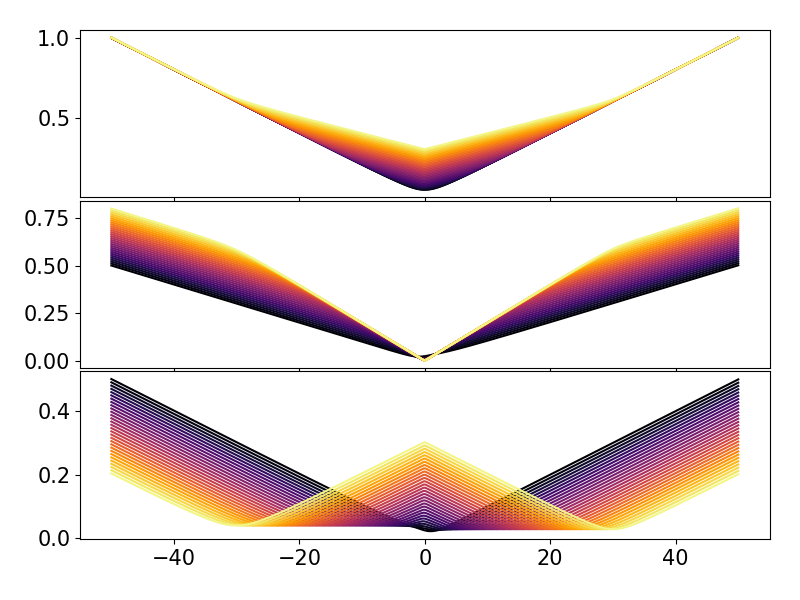

In [7]:
w=1
g=0.01*w

d=np.linspace(-50*g,50*g,5000)
k=np.linspace(0,15*g,30)
x=0
J=0

fig_energias=plt.figure(figsize=(8,6))
ax_e1=fig_energias.add_subplot(311)
ax_e2=fig_energias.add_subplot(312,sharex=ax_e1)
ax_e3=fig_energias.add_subplot(313,sharex=ax_e1)
colors=mpl.colormaps['inferno'](np.linspace(0,1,len(k)+1))
for i,k_i in enumerate(k):
    ax_e1.plot(d/g,np.abs(Omega_n_ij(2,2,1,d,g,k_i,J,x)),color=colors[i])
    ax_e2.plot(d/g,np.abs(Omega_n_ij(2,3,2,d,g,k_i,J,x)),color=colors[i])
    ax_e3.plot(d/g,np.abs(Omega_n_ij(2,3,1,d,g,k_i,J,x)),color=colors[i])


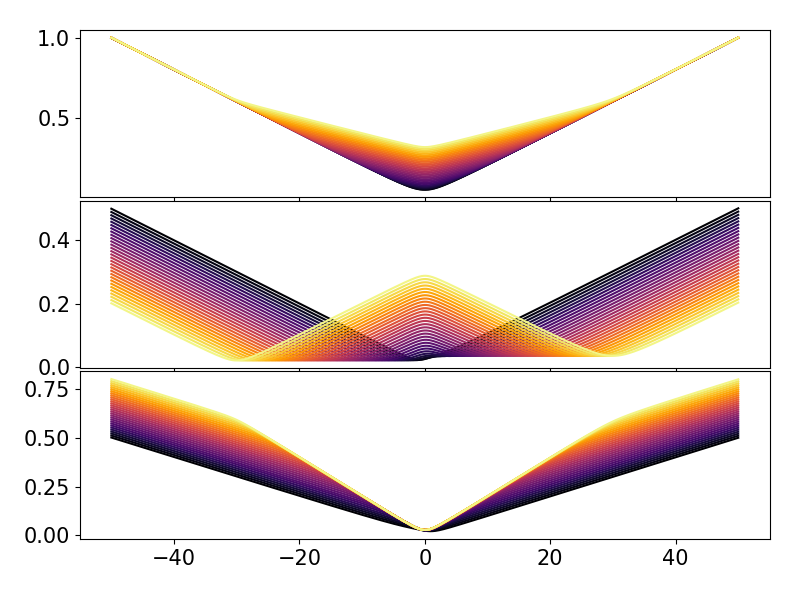

In [8]:
w=1
g=0.01*w

d=np.linspace(-50*g,50*g,5000)
J=np.linspace(0,15*g,30)
x=0
k=0

fig_energias=plt.figure(figsize=(8,6))
ax_e1=fig_energias.add_subplot(311)
ax_e2=fig_energias.add_subplot(312,sharex=ax_e1)
ax_e3=fig_energias.add_subplot(313,sharex=ax_e1)
colors=mpl.colormaps['inferno'](np.linspace(0,1,len(J)+1))
for i,J_i in enumerate(J):
    ax_e1.plot(d/g,np.abs(Omega_n_ij(2,2,1,d,g,k,J_i,x)),color=colors[i])
    ax_e2.plot(d/g,np.abs(Omega_n_ij(2,3,2,d,g,k,J_i,x)),color=colors[i])
    ax_e3.plot(d/g,np.abs(Omega_n_ij(2,3,1,d,g,k,J_i,x)),color=colors[i])


Representacion Qutrit

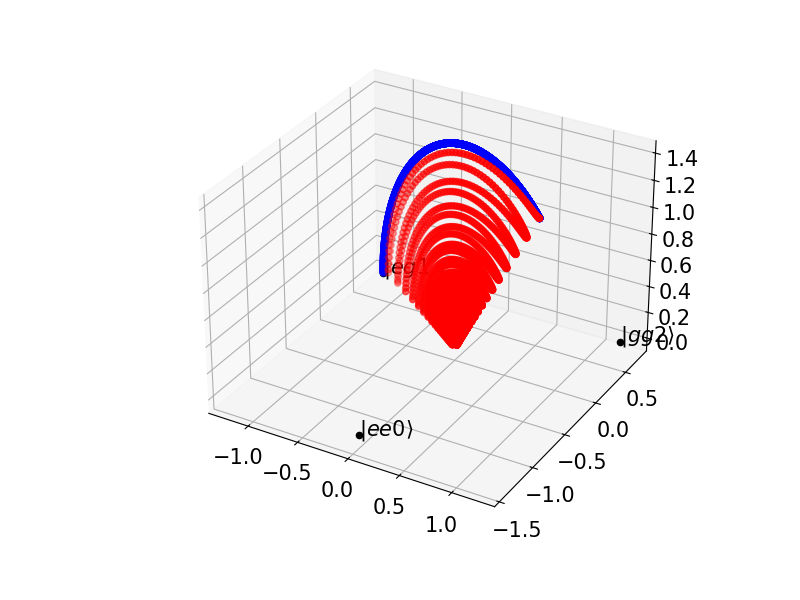

In [9]:
def pr(psi1,psi2=None):
    if psi2==None:
        return psi1.unit()*psi1.unit().dag()
    else: return psi1.unit()*psi2.unit().dag()

Z1=np.sqrt(3/2)*(pr(gg2)-pr(eg1+ge1))
Z2=np.sqrt(1/2)*(pr(gg2)+pr(eg1+ge1)-2*pr(ee0))

X1=np.sqrt(3/2)*(pr(gg2,eg1+ge1)+pr(gg2,eg1+ge1).dag())
X2=np.sqrt(3/2)*(pr(gg2,ee0)+pr(gg2,ee0).dag())
X3=np.sqrt(3/2)*(pr(eg1+ge1,ee0)+pr(eg1+ge1,ee0).dag())

Y1=np.sqrt(3/2)*(-1j*pr(gg2,eg1+ge1)+1j*pr(gg2,eg1+ge1).dag())
Y2=np.sqrt(3/2)*(-1j*pr(gg2,ee0)+1j*pr(gg2,ee0).dag())
Y3=np.sqrt(3/2)*(-1j*pr(eg1+ge1,ee0)+1j*pr(eg1+ge1,ee0).dag())

steps=3000

g_t=30

w0=1
g=0.01*w0

gamma=0.1*g
p=0.05*gamma

x=0*g       #1*g va en orden ascendiente
d=0*g       #1.1001*g#.5*g

k=0*g     #0*g va en orden descendiente para ser consistente con la flecha dibujada mas abajo en el plot
J=0*g

t_final=g_t/g
t=np.linspace(0,t_final,steps)

rho_0=(gg2+np.sqrt(1/2)*ee0).unit()


H=x*n2 + d/2*(sz1+sz2) + g*((sm1+sm2)*a.dag()+(sp1+sp2)*a) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2


sol_u=mesolve(H,rho_0,t)
sol_d=mesolve(H,rho_0,t,c_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp1,np.sqrt(p)*sp2])

def expect_gellman(sol):
    e_ops=[Z1,Z2,X1,X2,X3,Y1,Y2,Y3]
    expect_array=np.zeros((len(e_ops),len(sol.states)))
    for i,ops in enumerate(e_ops):
        for j in range(len(sol.states)):
            expect_array[i,j] = expect(ops,sol.states[j]) 
    return expect_array

expect_u=expect_gellman(sol_u)
expect_d=expect_gellman(sol_d)

w_u=np.sqrt(expect_u[2]**2+expect_u[3]**2+expect_u[4]**2+expect_u[5]**2+expect_u[6]**2+expect_u[7]**2)
w_d=np.sqrt(expect_d[2]**2+expect_d[3]**2+expect_d[4]**2+expect_d[5]**2+expect_d[6]**2+expect_d[7]**2)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(expect_u[0],expect_u[1],w_u,color='blue')
ax.scatter(expect_d[0],expect_d[1],w_d,color='red')

ax.scatter(0,-np.sqrt(2),0,color='black')
ax.text(0,-np.sqrt(2),0,r'$| ee0 \rangle$')

ax.scatter(np.sqrt(3/2),np.sqrt(1/2),0,color='black')
ax.text(np.sqrt(3/2),np.sqrt(1/2),0,r'$| gg2 \rangle$')

ax.scatter(-np.sqrt(3/2),np.sqrt(1/2),0,color='black')
ax.text(-np.sqrt(3/2),np.sqrt(1/2),0,r'$| eg1+ \rangle$')

plt.show()
# def eta(sol):
#     delta_E=np.array([expect(H*H,sol.states[i])-expect(H,sol.states[i])**2 for i in range(len(sol.states))])
#     print(delta_E)
#     int_E=np.array([np.trapezoid(delta_E[:i],t[:i]) for i in range(len(delta_E))])
#     print(int_E)
#     nom=np.array([np.arccos(sol.states[0].dag()*sol.states[i]) for i in range(len(sol.states))])
#     return nom[2:]/int_E[2:]

# eta(sol_u)
# fig=plt.figure(figsize=(8,6))
# ax=fig.add_subplot()
# ax.plot(t[2:],eta(sol_u),color='black')
# ax.hlines([1,0],t[2],t[-1])
# plt.show()

#Supuesto chequeo de que la evolucion generada por el Hamiltoniano dice que si esto da cero entonces es una geodesica.
# geod=(H*H-expect(H*H,rho_0))*rho_0

# print(geod)

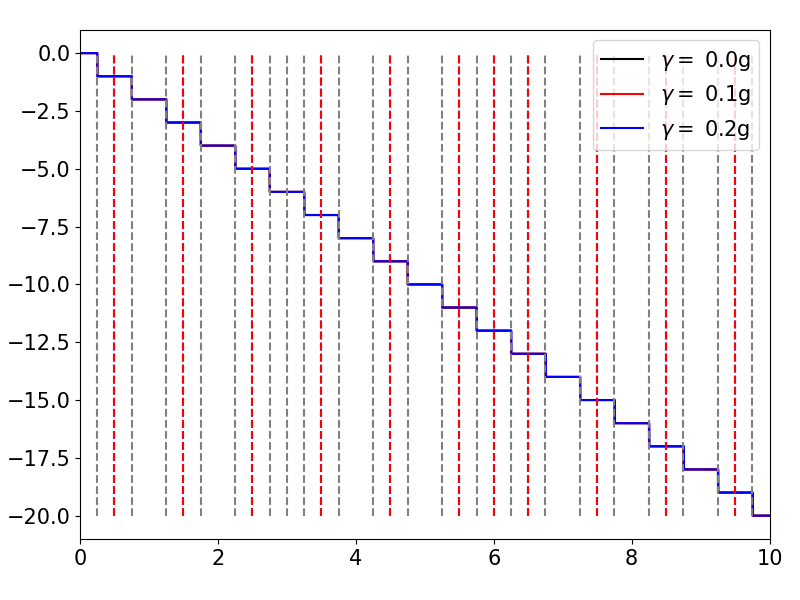

In [10]:
steps=30000

w0=1
g=0.001*w0

# gamma=0.1*g
# p=0.05*gamma

x=0*g       #1*g va en orden ascendiente
d=0.00001*g       #1.1001*g#.5*g

k=0*g     #0*g va en orden descendiente para ser consistente con la flecha dibujada mas abajo en el plot
J=0*g
T23=2*np.pi/np.abs(Omega_n_ij(2,2,3,d,g,k,J,x))
T12=2*np.pi/np.abs(Omega_n_ij(2,2,1,d,g,k,J,x))
T13=2*np.pi/np.abs(Omega_n_ij(2,1,3,d,g,k,J,x))

t_final=10*T23
t=np.linspace(0,t_final,steps)

rho_0=(eg1+ge1).unit()

H=x*n2 + d/2*(sz1+sz2) + g*((sm1+sm2)*a.dag()+(sp1+sp2)*a) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot()
color=['black','red','blue']

for i,gamma in enumerate([0,0.1*g,0.2*g]):
    p=0.05*gamma
    sol=mesolve(H,rho_0,t,c_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sm1,np.sqrt(p)*sm2])
    fg,_,_=jcm.fases(sol)
    ax.plot(t/T23,fg/np.pi,label=fr'$\gamma=$ {gamma/g}g',color=color[i])

ymin=np.min(fg/np.pi)
ymax=np.max(fg/np.pi)

def vlines(T1,T2):
    return np.arange(0.25,t_final/T2,0.5)*T1/T2
ax.vlines(vlines(T12,T12),ymin,ymax,linestyles='dashed',color='grey')
ax.vlines(3,ymin,ymax,linestyles='dashed',color='grey')

ax.vlines(vlines(T23,T12),ymin,ymax,linestyles='dashed',color='blue')
ax.vlines(3*T23/T12,ymin,ymax,linestyles='dashed',color='blue')

ax.vlines(vlines(T13,T12),ymin,ymax,linestyles='dashed',color='red')
ax.vlines(3*T13/T12,ymin,ymax,linestyles='dashed',color='red')

ax.set_xlim(0,10)

ax.legend()
plt.show()


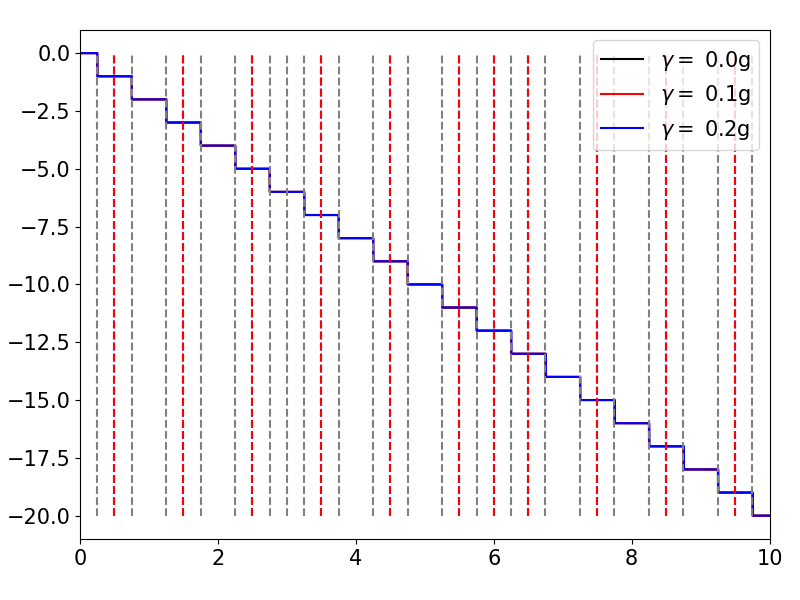

In [11]:
steps=30000

w0=1
g=0.001*w0

# gamma=0.1*g
# p=0.05*gamma

x=0*g       #1*g va en orden ascendiente
d=0.00001*g       #1.1001*g#.5*g

k=0*g     #0*g va en orden descendiente para ser consistente con la flecha dibujada mas abajo en el plot
J=0*g
T23=2*np.pi/np.abs(Omega_n_ij(2,2,3,d,g,k,J,x))
T12=2*np.pi/np.abs(Omega_n_ij(2,2,1,d,g,k,J,x))
T13=2*np.pi/np.abs(Omega_n_ij(2,1,3,d,g,k,J,x))

t_final=10*T23
t=np.linspace(0,t_final,steps)

rho_0=(eg1+ge1).unit()

H=x*n2 + d/2*(sz1+sz2) + g*((sm1+sm2)*a.dag()+(sp1+sp2)*a) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot()
color=['black','red','blue']

for i,gamma in enumerate([0,0.1*g,0.2*g]):
    p=0.05*gamma
    sol=mesolve(H,rho_0,t,c_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sm1,np.sqrt(p)*sm2])
    fg,_,_=jcm.fases(sol)
    ax.plot(t/T23,fg/np.pi,label=fr'$\gamma=$ {gamma/g}g',color=color[i])

ymin=np.min(fg/np.pi)
ymax=np.max(fg/np.pi)

def vlines(T1,T2):
    return np.arange(0.25,t_final/T2,0.5)*T1/T2
ax.vlines(vlines(T12,T12),ymin,ymax,linestyles='dashed',color='grey')
ax.vlines(3,ymin,ymax,linestyles='dashed',color='grey')

ax.vlines(vlines(T23,T12),ymin,ymax,linestyles='dashed',color='blue')
ax.vlines(3*T23/T12,ymin,ymax,linestyles='dashed',color='blue')

ax.vlines(vlines(T13,T12),ymin,ymax,linestyles='dashed',color='red')
ax.vlines(3*T13/T12,ymin,ymax,linestyles='dashed',color='red')

ax.set_xlim(0,10)

ax.legend()
plt.show()

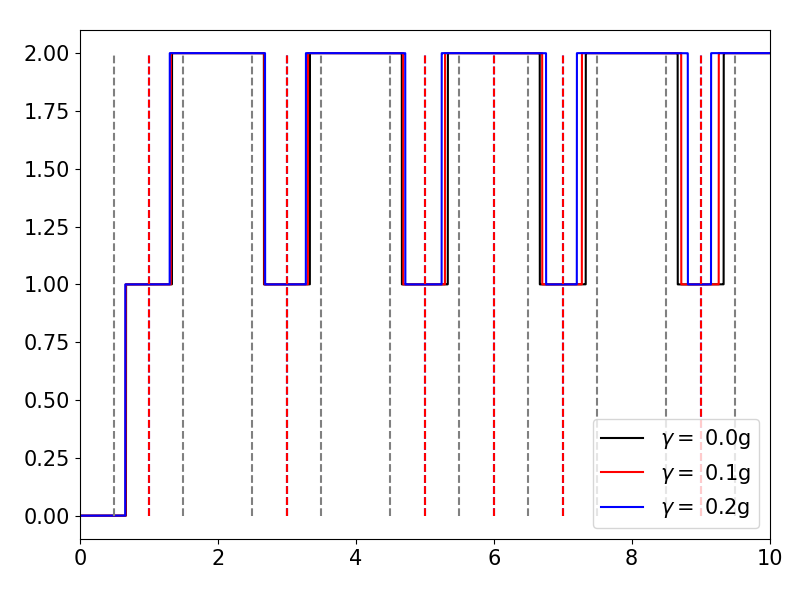

In [12]:
steps=30000

w0=1
g=0.001*w0

# gamma=0.1*g
# p=0.05*gamma

x=0*g       #1*g va en orden ascendiente
d=0.000001*g       #1.1001*g#.5*g

k=0*g     #0*g va en orden descendiente para ser consistente con la flecha dibujada mas abajo en el plot
J=0*g
T23=2*np.pi/np.abs(Omega_n_ij(2,2,3,d,g,k,J,x))
T12=2*np.pi/np.abs(Omega_n_ij(2,2,1,d,g,k,J,x))
T13=2*np.pi/np.abs(Omega_n_ij(2,1,3,d,g,k,J,x))

t_final=10*T12
t=np.linspace(0,t_final,steps)

rho_0=(gg2).unit()

H=x*n2 + d/2*(sz1+sz2) + g*((sm1+sm2)*a.dag()+(sp1+sp2)*a) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot()
color=['black','red','blue']

for i,gamma in enumerate([0,0.1*g,0.2*g]):
    p=0.05*gamma
    sol=mesolve(H,rho_0,t,c_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sm1,np.sqrt(p)*sm2])
    fg,_,_=jcm.fases(sol)
    ax.plot(t/T12,fg/np.pi,label=fr'$\gamma=$ {gamma/g}g',color=color[i])

ymin=np.min(fg/np.pi)
ymax=np.max(fg/np.pi)
def vlines(T1,T2):
    return np.arange(0.5,t_final/T2)*T1/T2
ax.vlines(vlines(T12,T12),ymin,ymax,linestyles='dashed',color='grey')
ax.vlines(3,ymin,ymax,linestyles='dashed',color='grey')

ax.vlines(vlines(T23,T12),ymin,ymax,linestyles='dashed',color='blue')
ax.vlines(3*T23/T12,ymin,ymax,linestyles='dashed',color='blue')

ax.vlines(vlines(T13,T12),ymin,ymax,linestyles='dashed',color='red')
ax.vlines(3*T13/T12,ymin,ymax,linestyles='dashed',color='red')
ax.set_xlim(0,10)

ax.legend()
plt.show()

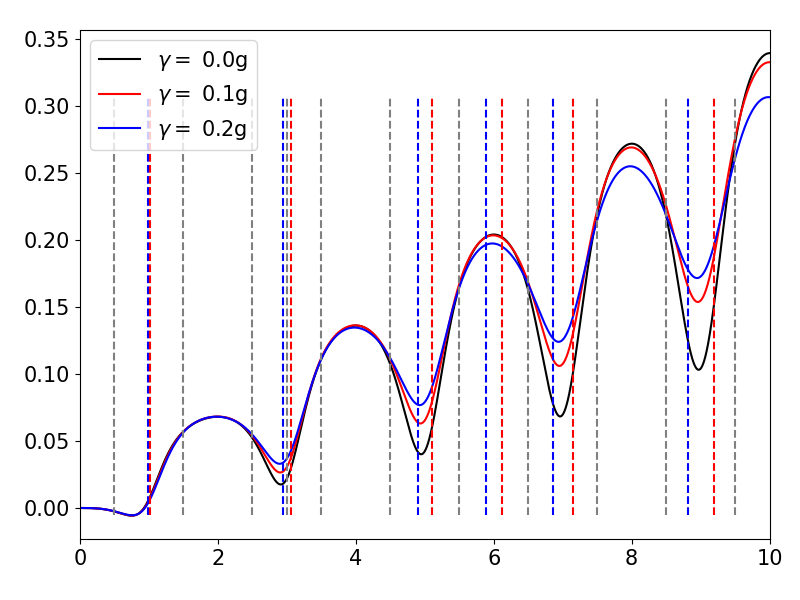

In [13]:
steps=30000

w0=1
g=0.001*w0

# gamma=0.1*g
# p=0.05*gamma

x=0*g       #1*g va en orden ascendiente
d=0.1*g       #1.1001*g#.5*g

k=0*g     #0*g va en orden descendiente para ser consistente con la flecha dibujada mas abajo en el plot
J=0*g
T23=2*np.pi/np.abs(Omega_n_ij(2,2,3,d,g,k,J,x))
T12=2*np.pi/np.abs(Omega_n_ij(2,2,1,d,g,k,J,x))
T13=2*np.pi/np.abs(Omega_n_ij(2,1,3,d,g,k,J,x))

t_final=10*T12
t=np.linspace(0,t_final,steps)

rho_0=(ee0).unit()

H=x*n2 + d/2*(sz1+sz2) + g*((sm1+sm2)*a.dag()+(sp1+sp2)*a) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot()
color=['black','red','blue']

for i,gamma in enumerate([0,0.1*g,0.2*g]):
    p=0.05*gamma
    sol=mesolve(H,rho_0,t,c_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sm1,np.sqrt(p)*sm2])
    fg,_,_=jcm.fases(sol)
    ax.plot(t/T12,fg/np.pi,label=fr'$\gamma=$ {gamma/g}g',color=color[i])

ymin=np.min(fg/np.pi)
ymax=np.max(fg/np.pi)

def vlines(T1,T2):
    return np.arange(0.5,t_final/T2)*T1/T2
ax.vlines(vlines(T12,T12),ymin,ymax,linestyles='dashed',color='grey')
ax.vlines(3,ymin,ymax,linestyles='dashed',color='grey')

ax.vlines(vlines(T23,T12),ymin,ymax,linestyles='dashed',color='blue')
ax.vlines(3*T23/T12,ymin,ymax,linestyles='dashed',color='blue')

ax.vlines(vlines(T13,T12),ymin,ymax,linestyles='dashed',color='red')
ax.vlines(3*T13/T12,ymin,ymax,linestyles='dashed',color='red')
ax.set_xlim(0,10)
ax.legend()
plt.show()